<a href="https://colab.research.google.com/github/sametgirgin/ColabNotebooks/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Recognition





# Task 1

For all the images in the faces_assignment folder, perform age, gender, race, and emotion detection.

- Use age as it is.

- For gender, use dominant_gender.

- For race, use dominant_race.

- For emotion, use dominant_emotion.

The output should include: file_name (i.e., the directory path of the file you are processing), age, gender, race, and emotion.

An example output should look like this:


```
 [{'file_name': '/content/faces_lectures/face18.png',
  'age': 28,
  'gender': 'Man',
  'race': 'white',
  'emotion': 'sad'},
 {'file_name': '/content/faces_lectures/face16.png',
  'age': 45,
  'gender': 'Man',
  'race': 'white',
  'emotion': 'happy'},
 {'file_name': '/content/faces_lectures/face17.png',
  'age': 31,
  'gender': 'Woman',
  'race': 'asian',
  'emotion': 'happy'},
 {'file_name': '/content/faces_lectures/face19.png',
  'age': 22,
  'gender': 'Man',
  'race': 'asian',
  'emotion': 'happy'},
 {'file_name': '/content/faces_lectures/face20.png',
  'age': 26,
  'gender': 'Woman',
  'race': 'asian',
  'emotion': 'neutral'}]
```


## Task 1 Solution

In [1]:
!pip install deepface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/128.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.7 MB/s eta 0:00:00


In [2]:
from deepface import DeepFace
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

25-08-29 18:24:12 - Directory /root/.deepface has been created
25-08-29 18:24:12 - Directory /root/.deepface/weights has been created


In [10]:
#This code defines a Python function called analyze_images_in_directory that takes a directory path as
#input and performs face analysis on all image files within that directory.

def analyze_images_in_directory(root_path):#This line defines the function named analyze_images_in_directory that accepts one argument, root_path, which is expected to be the path to the directory containing the images.
    #Gets a list of all files and directories in the root_path.
    image_paths = [os.path.join(root_path, f) for f in os.listdir(root_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    results = [] #Initializes an empty list called results which will store the analysis results for each face found in the images.

    for path in image_paths: #This loop iterates through each image file path in the image_paths list.

        #This is the core of the face analysis. It calls the DeepFace.analyze() function from the deepface library.
        result = DeepFace.analyze(path, actions=["age", "gender", "race", "emotion"])

        for idx, face in enumerate(result):
            file_name = path.split("/")[-1]

            results.append({
                "file_name": f"{file_name}",
                "age": face["age"],
                "gender": face["dominant_gender"],
                "race": face["dominant_race"],
                "emotion": face["dominant_emotion"]
            })

    return results

In [6]:

images_path = "/content/drive/MyDrive/Colab Notebooks/faces_assignment"


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
analyze_images_in_directory(images_path)

Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    

25-08-29 18:31:11 - 🔗 age_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5 to /root/.deepface/weights/age_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  2%|▏         | 11.0M/539M [00:00<00:05, 102MB/s]
  6%|▌         | 33.0M/539M [00:00<00:03, 168MB/s]
  9%|▉         | 50.3M/539M [00:00<00:03, 157MB/s]
 14%|█▎        | 73.9M/539M [00:00<00:02, 178MB/s]
 17%|█▋        | 92.3M/539M [00:00<00:02, 179MB/s]
 21%|██        | 112M/539M [00:00<00:02, 184MB/s] 
 25%|██▌       | 136M/539M [00:00<00:01, 202MB/s]
 29%|██▉       | 157M/539M [00:00<00:01, 200MB/s]
 33%|███▎      | 179M/539M [00:00<00:01, 207MB/s]
 37%|███▋      | 200M/539M [00:01<00:01, 204MB/s]
 41%|████      | 221M/539M [00:01<00:01, 204MB/s]
 45%|████▌     | 244M/539M [00:01<00:01, 210MB/s]
 49%|████▉     | 265M/539M [00:05<00:15, 17.7MB/s]
 52%|█████▏    | 280M/539M [00:06<00:15, 16.6MB/s]
 56%|█████▋    | 304M/539M [00:06<00:09, 24.3MB/s]
 61%|██████    | 328M/539M [00:06<00:06

25-08-29 18:31:23 - 🔗 gender_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5 to /root/.deepface/weights/gender_model_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 11.0M/537M [00:00<00:05, 99.8MB/s]
  4%|▍         | 22.0M/537M [00:00<00:04, 105MB/s] 
  9%|▊         | 46.7M/537M [00:00<00:02, 167MB/s]
 14%|█▎        | 72.9M/537M [00:00<00:02, 202MB/s]
 17%|█▋        | 93.3M/537M [00:00<00:02, 195MB/s]
 21%|██        | 113M/537M [00:00<00:02, 188MB/s] 
 25%|██▍       | 133M/537M [00:00<00:02, 187MB/s]
 29%|██▉       | 158M/537M [00:00<00:01, 205MB/s]
 34%|███▎      | 180M/537M [00:00<00:01, 206MB/s]
 37%|███▋      | 201M/537M [00:01<00:02, 167MB/s]
 41%|████      | 220M/537M [00:01<00:02, 141MB/s]
 45%|████▍     | 242M/537M [00:01<00:01, 153MB/s]
 50%|████▉     | 268M/537M [00:01<00:01, 179MB/s]
 54%|█████▎    | 288M/537M [00:01<00:01, 166MB/s]
 58%|█████▊    | 311M/537M [00:01<00:01, 182MB/s]
 61%|██████▏   | 330M/537M [00:01<

25-08-29 18:31:31 - 🔗 race_model_single_batch.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5 to /root/.deepface/weights/race_model_single_batch.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 9.96M/537M [00:00<00:05, 98.6MB/s]
  6%|▌         | 32.0M/537M [00:00<00:03, 168MB/s] 
 11%|█         | 58.2M/537M [00:00<00:02, 210MB/s]
 16%|█▌        | 86.5M/537M [00:00<00:01, 238MB/s]
 21%|██        | 112M/537M [00:00<00:01, 244MB/s] 
 25%|██▌       | 137M/537M [00:00<00:01, 235MB/s]
 30%|██▉       | 160M/537M [00:00<00:01, 234MB/s]
 35%|███▍      | 188M/537M [00:00<00:01, 245MB/s]
 40%|███▉      | 212M/537M [00:00<00:01, 218MB/s]
 44%|████▎     | 235M/537M [00:01<00:01, 220MB/s]
 48%|████▊     | 257M/537M [00:01<00:01, 214MB/s]
 53%|█████▎    | 286M/537M [00:01<00:01, 229MB/s]
 58%|█████▊    | 309M/537M [00:01<00:00, 229MB/s]
 62%|██████▏   | 334M/537M [00:01<00:00, 233MB/s]
 67%|██████▋   | 358M/537M [00:01<00:00, 229MB/s]
 71%|███████   | 383M/537M [0

25-08-29 18:31:36 - 🔗 facial_expression_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5 to /root/.deepface/weights/facial_expression_model_weights.h5...



100%|██████████| 5.98M/5.98M [00:00<00:00, 70.4MB/s]
Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]


[{'file_name': 'face3.png',
  'age': 30,
  'gender': 'Woman',
  'race': 'white',
  'emotion': 'happy'},
 {'file_name': 'face2.png',
  'age': 23,
  'gender': 'Woman',
  'race': 'white',
  'emotion': 'happy'},
 {'file_name': 'face1.png',
  'age': 35,
  'gender': 'Woman',
  'race': 'white',
  'emotion': 'fear'},
 {'file_name': 'face4.png',
  'age': 27,
  'gender': 'Man',
  'race': 'white',
  'emotion': 'happy'},
 {'file_name': 'face5.png',
  'age': 25,
  'gender': 'Man',
  'race': 'middle eastern',
  'emotion': 'happy'}]

# Task 2

Using the output of the previous function, write this information onto the images.

First, do it for a single image, then for all images in a directory.

The function should be named visualize_all_attribute.

Hints:

- The function should have two arguments: img_path, result.

- Its name should be visualize_all_attribute.

- There is no need for the if-else block from the lesson.

- Focus only on the title section and reflect the information there.

In other words, age, gender, race, and emotion information should appear in the title of the plot, not directly on the image itself (just like in our application).

# Task 2 Solution


In [11]:
def visualize_all_attribute(img_path, result):

    image = cv2.imread(img_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.5
    thickness = 2
    color = (255, 255, 255)
    shadow_color = (0, 0, 0)

    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(f"Age:{result[0]['age']}, Gender: {result[0]['dominant_gender']}, Race: {result[0]['dominant_race']}, Emotion: {result[0]['dominant_emotion']}")
    plt.show()

In [18]:
img_path = "/content/drive/MyDrive/Colab Notebooks/faces_assignment/face1.png"

In [19]:
result = DeepFace.analyze(img_path=img_path, actions=["age", "gender", "race", "emotion"])

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]


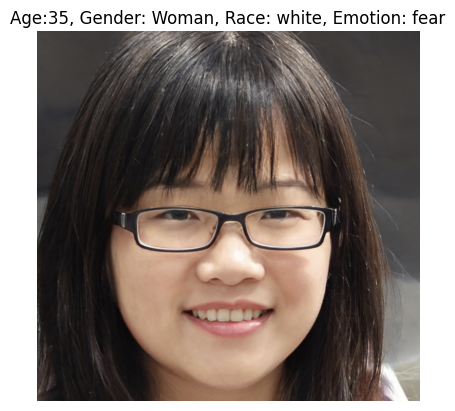

In [ ]:
visualize_all_attribute(img_path, result)

In [21]:
images_path = "/content/drive/MyDrive/Colab Notebooks/faces_assignment"

In [22]:

image_paths = [os.path.join(images_path, f) for f in os.listdir(images_path) if f.endswith(('.jpg', '.jpeg', '.png'))]


In [23]:
image_paths

['/content/drive/MyDrive/Colab Notebooks/faces_assignment/face3.png',
 '/content/drive/MyDrive/Colab Notebooks/faces_assignment/face2.png',
 '/content/drive/MyDrive/Colab Notebooks/faces_assignment/face1.png',
 '/content/drive/MyDrive/Colab Notebooks/faces_assignment/face4.png',
 '/content/drive/MyDrive/Colab Notebooks/faces_assignment/face5.png']

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]


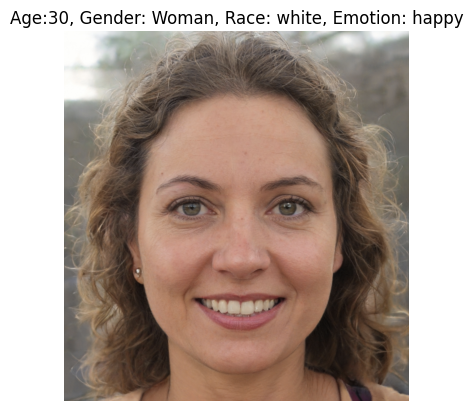

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]


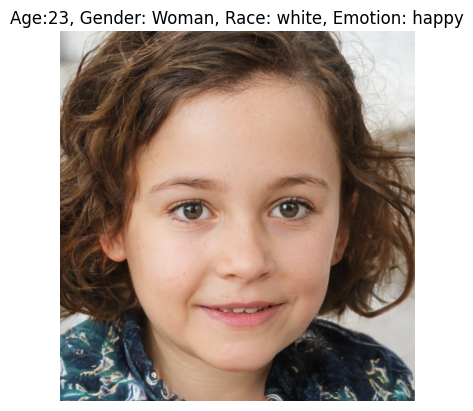

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


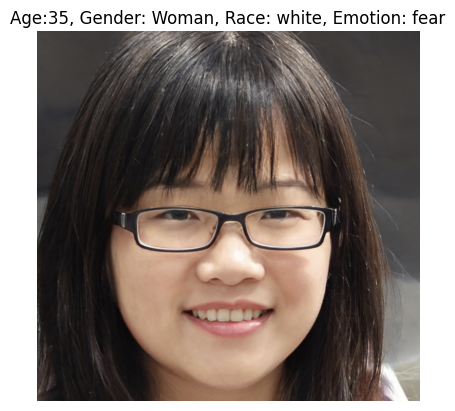

Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]


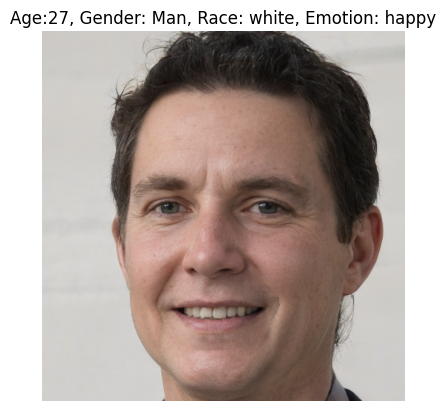

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]


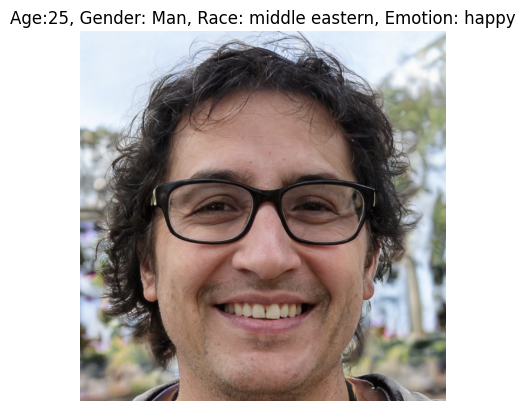

In [24]:
for path in image_paths:

    result = DeepFace.analyze(path, ["age", "gender", "race", "emotion"])

    visualize_all_attribute(path, result)